## Introduction

This project involves data wrangling, data analysis and little visualiztion.

The goal is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

In [1]:
#Installing all dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import requests
import tweepy
import os
import json
import time 
import re
import warnings
from tweepy import OAuthHandler
from timeit import default_timer as timer
%matplotlib inline
sns.set_style("darkgrid")

## Data Gathering

Three methods were used to gather the dataset.  

 1 The first dataset(twitter-archive-enhanced.csv) was downloaded into the system and read with pandas as a dataframe.  
 
 2 The second was gotten with a url request, and then written as a file.  
 
 3 I couldn't download the 3rd  dataset from twitter, so I downloaded the json file (stored in dictionary) directly from Udacity and extracted columns of interest, and converted the list to dataframe

In [2]:
# Reading the csv file
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
# Using url to access the image prediction file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_request = requests.get(url)
file_request

<Response [200]>

In [4]:
# Saving all into a file
with open("image_predictions.tsv", mode = 'wb') as file:
    file.write(file_request.content)

In [5]:
image_predictions = pd.read_csv("image_predictions.tsv", sep ='\t')

In [6]:
# # code for Twitter API
# access_token = ""
# access_secret = ""
# consumer_key = ""
# consumer_secret = ""

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [7]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
failed_id = []
with open('tweet_json.txt', 'w', encoding='UTF-8') as json_file:
    for id_ in tweet_ids:
        try:
            tweet = api.get_status(id_)
            tweet = tweet._json
            json.dump(tweet, json_file)
            json_file.write('\n')
        except:
            print('Failed retrieving tweet with id ',id_)
            failed_id.append(id_)

Failed retrieving tweet with id  892420643555336193
Failed retrieving tweet with id  892177421306343426
Failed retrieving tweet with id  891815181378084864
Failed retrieving tweet with id  891689557279858688
Failed retrieving tweet with id  891327558926688256
Failed retrieving tweet with id  891087950875897856
Failed retrieving tweet with id  890971913173991426
Failed retrieving tweet with id  890729181411237888
Failed retrieving tweet with id  890609185150312448
Failed retrieving tweet with id  890240255349198849
Failed retrieving tweet with id  890006608113172480
Failed retrieving tweet with id  889880896479866881
Failed retrieving tweet with id  889665388333682689
Failed retrieving tweet with id  889638837579907072
Failed retrieving tweet with id  889531135344209921
Failed retrieving tweet with id  889278841981685760
Failed retrieving tweet with id  888917238123831296
Failed retrieving tweet with id  888804989199671297
Failed retrieving tweet with id  888554962724278272
Failed retri

Failed retrieving tweet with id  780800785462489090
Failed retrieving tweet with id  780601303617732608
Failed retrieving tweet with id  780543529827336192
Failed retrieving tweet with id  780496263422808064
Failed retrieving tweet with id  780476555013349377
Failed retrieving tweet with id  780459368902959104
Failed retrieving tweet with id  780192070812196864
Failed retrieving tweet with id  780092040432480260
Failed retrieving tweet with id  780074436359819264
Failed retrieving tweet with id  779834332596887552
Failed retrieving tweet with id  779377524342161408
Failed retrieving tweet with id  779124354206535695
Failed retrieving tweet with id  779123168116150273
Failed retrieving tweet with id  779056095788752897
Failed retrieving tweet with id  778990705243029504
Failed retrieving tweet with id  778774459159379968
Failed retrieving tweet with id  778764940568104960
Failed retrieving tweet with id  778748913645780993
Failed retrieving tweet with id  778650543019483137
Failed retri

Failed retrieving tweet with id  704499785726889984
Failed retrieving tweet with id  704491224099647488
Failed retrieving tweet with id  704480331685040129
Failed retrieving tweet with id  704364645503647744
Failed retrieving tweet with id  704347321748819968
Failed retrieving tweet with id  704134088924532736
Failed retrieving tweet with id  704113298707505153
Failed retrieving tweet with id  704054845121142784
Failed retrieving tweet with id  703774238772166656
Failed retrieving tweet with id  703769065844768768
Failed retrieving tweet with id  703631701117943808
Failed retrieving tweet with id  703611486317502464
Failed retrieving tweet with id  703425003149250560
Failed retrieving tweet with id  703407252292673536
Failed retrieving tweet with id  703382836347330562
Failed retrieving tweet with id  703356393781329922
Failed retrieving tweet with id  703268521220972544
Failed retrieving tweet with id  703079050210877440
Failed retrieving tweet with id  703041949650034688
Failed retri

Failed retrieving tweet with id  673580926094458881
Failed retrieving tweet with id  673576835670777856
Failed retrieving tweet with id  673363615379013632
Failed retrieving tweet with id  673359818736984064
Failed retrieving tweet with id  673355879178194945
Failed retrieving tweet with id  673352124999274496
Failed retrieving tweet with id  673350198937153538
Failed retrieving tweet with id  673345638550134785
Failed retrieving tweet with id  673343217010679808
Failed retrieving tweet with id  673342308415348736
Failed retrieving tweet with id  673320132811366400
Failed retrieving tweet with id  673317986296586240
Failed retrieving tweet with id  673295268553605120
Failed retrieving tweet with id  673270968295534593
Failed retrieving tweet with id  673240798075449344
Failed retrieving tweet with id  673213039743795200
Failed retrieving tweet with id  673148804208660480
Failed retrieving tweet with id  672997845381865473
Failed retrieving tweet with id  672995267319328768
Failed retri

In [8]:
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        tweet_id = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        followers_count = data['user']['followers_count']
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count,
                        'followers_count' : followers_count})

In [9]:
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count','followers_count'])

## Data Assessment

Data Assessment was done in two ways. 
 * Visual Assessment
 * Programmatic Assessment

### Visual
Looking at the dataset in the table format

### twitter_archive (Dataset 1)

In [10]:
# Looking at the first 10 rows
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### image_predictions (Dataset 2)

In [11]:
# Visual of the last 10 rows
image_predictions.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


### tweet_json (Dataset 3)

In [12]:
# Visual of the first 10 rows
tweet_json.head(10)

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
5,891087950875897856,3261,20562,3200889
6,890971913173991426,2158,12041,3200889
7,890729181411237888,16716,56848,3200889
8,890609185150312448,4429,28226,3200889
9,890240255349198849,7711,32467,3200889


### Programmatic assessment using pandas methods


In [13]:
# Summary of twitter_archive
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
# 10 samples of the "text" column in the twitter archive
twitter_archive.text.sample(10)

32      RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
54      This is Gary. He couldn't miss this puppertuni...
393     This is Mo. No one will push him around in the...
616     Here's a sleepy doggo that requested some assi...
378     This is Kona. Yesterday she stopped by the dep...
2113    Meet Hank and Sully. Hank is very proud of the...
1602    This is Lorelei. She's contemplating her exist...
325     This is Bentley. Hairbrushes are his favorite ...
2117             Meet Herb. 12/10 https://t.co/tLRyYvCci3
1253    Say hello to Sora. She's an Egyptian Pumpernic...
Name: text, dtype: object

In [15]:
# 10 samples of the "expanded url" column in the twitter archive
twitter_archive.expanded_urls.sample(10)

1210    https://twitter.com/dog_rates/status/715680795...
195     https://twitter.com/frasercampbell_/status/855...
283     https://twitter.com/ktla/status/83894871422799...
2279    https://twitter.com/dog_rates/status/667405339...
2352    https://twitter.com/dog_rates/status/666044226...
586     https://twitter.com/dog_rates/status/775085132...
2033    https://twitter.com/dog_rates/status/671744970...
212     https://twitter.com/eddie_coe98/status/8482893...
1501    https://twitter.com/dog_rates/status/692142790...
1919    https://twitter.com/dog_rates/status/674269164...
Name: expanded_urls, dtype: object

In [16]:
# Checking for duplicated rows
twitter_archive.duplicated().sum()

0

In [17]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [19]:
twitter_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# Checking for duplicated rows in image_predictions table
image_predictions.duplicated().sum()

0

In [22]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [23]:
# Checking for duplicated rows in the tweet_json table
tweet_json.duplicated().sum()

0

In [24]:
tweet_json.describe()

,retweet_count,favorite_count,followers_count
count,2354.000000,2354.000000,2.354000e+03
mean,3164.797366,8080.968564,3.200942e+06
std,5284.770364,11814.771334,4.457302e+01
min,0.000000,0.000000,3.200799e+06
25%,624.500000,1415.000000,3.200898e+06
50%,1473.500000,3603.500000,3.200945e+06
75%,3652.000000,10122.250000,3.200953e+06
max,79515.000000,132810.000000,3.201018e+06


### Data Quality

 * **twitter_archive** 

   * Datatype for the tweet_id column should be object, it's currently an int64

   * timestamp column is of int64 datatype, supposed to be datetime.
    
   * Many missing names classified as None and error in dog's names ("a", "an").
    
   * Keep only original tweets, remove retweets and replies.
   
   * Correct numerators with decimals
 
   * Missing values (NaN) in several columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls)
   
   * Extract main source of tweet from source column
   
   * Remove hyperlink from text
  
 

 * **image_predictions**

   * Wrong datatype for tweet_id (int64), should be object
    
   * No defined letter case for columns p1, p2, p3. (mixture of both lower and upper)
   
   
 * **tweet_json**

   * Wrong datatype for tweet_id (int64), should be object

## Cleaning Data

In [25]:
# Making copies of the original dataset for cleaning
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

#### Define

 * fixing wrong datatypes across the 3 data

In [26]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [27]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


#### code

In [29]:
# Convert tweet_id to str from twitter_archive, image_prediction, tweet_json tables.
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype(str)

# convert timestamp to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### test

In [30]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [31]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [32]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


#### define
* fixing error in dog's name


#### code

In [33]:
twitter_archive_clean.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [34]:
twitter_archive_clean['name'][twitter_archive_clean.name.str.match('[a-z]+')] = 'None'

C:\Users\AADEFA~1\AppData\Local\Temp/ipykernel_6572/352023044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean['name'][twitter_archive_clean.name.str.match('[a-z]+')] = 'None'


#### test

In [35]:
# confirm changes
pd.set_option("display.max_rows", 15) # checked all rows before, using this set max rows to see
twitter_archive_clean.name.value_counts()

None          854
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 932, dtype: int64

#### define

Keep only original tweets and drop retweets with images

#### code

In [36]:
#Delete retweets by filtering the NaN of retweeted_status_user_id
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

#Delete retweets by filtering the NaN of in_reply_to_status_id
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['in_reply_to_status_id'])]

#### test

In [37]:
#confirm changes
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))
print(sum(twitter_archive_clean.in_reply_to_status_id.value_counts()))

0
0


#### define

Correct numerators with decimals

#### code

In [38]:
 # checking columns to see wrongly captured decimals in text
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\AADEFA~1\AppData\Local\Temp/ipykernel_6572/1698101523.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [39]:
# Making the extraction
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['text'].str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0]

#### test

In [40]:
 #confirm changes
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\AADEFA~1\AppData\Local\Temp/ipykernel_6572/2055504919.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10


#### define
 * Drop columns with only missing values and columns that we don't help in our analysis

#### code

In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   object          

In [42]:
twitter_archive_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], inplace=True)

#### test

In [43]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


#### define

Try to maintain a uniform case for the p1, p2 and p3 columns in the image_predicitons_clean table. Converting all to lower case

#### code

In [44]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.lower()
image_predictions_clean.p2 = image_predictions_clean.p2.str.lower()
image_predictions_clean.p3 = image_predictions_clean.p3.str.lower()

#### test

In [45]:
image_predictions_clean[["p1","p2","p3"]].head()

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman


#### define

Remove hyperlink from text column.


In [46]:
twitter_archive_clean.text.str.find("http")

0        86
1       139
2       122
3        80
4       139
       ... 
2351     97
2352    114
2353    107
2354    116
2355    108
Name: text, Length: 2097, dtype: int64

#### code

In [47]:
# define a function to find "http" and remove http and succeeding texts

def findhtml(x):
        http_pos = x.find("http")
        # If no link, retain row
        if http_pos == -1:
            x = x
        else:
            # Remove space before link to end
            x = x[:http_pos - 1]
        return x
    
twitter_archive_clean.text = twitter_archive_clean.text.apply(findhtml)

#### test

In [48]:
twitter_archive_clean.text.str.find("http") # -1 inidcates there's no http in the text

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
2351   -1
2352   -1
2353   -1
2354   -1
2355   -1
Name: text, Length: 2097, dtype: int64

#### define

Extracting the main source of the tweet, for better analysis.

In [49]:
#extract values
twitter_archive_clean.source = twitter_archive_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

In [50]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### test

In [51]:
twitter_archive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,None,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,None,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,None,None,None,None,None


## Tidiness

#### define
Create one column for the various dog stages

#### code

In [52]:
# All these refer to the dog stages
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,doggo,floofer,pupper,puppo
804,None,None,None,None
1727,None,None,None,None
2315,None,None,None,None
503,None,None,None,None
1146,None,None,None,None
812,None,None,None,None
866,None,None,None,None
1719,None,None,None,None
1333,None,None,None,None
1622,None,None,None,None


In [53]:
# Count of all different dog stages
twitter_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1761
1,None,None,None,puppo,23
2,None,None,pupper,None,221
3,None,floofer,None,None,9
4,doggo,None,None,None,72
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,9
7,doggo,floofer,None,None,1


In [54]:
# Converting all 'none' or nan to empty strings
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.doggo.replace(np.NaN, '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace(np.NaN, '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace(np.NaN, '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace(np.NaN, '', inplace=True)

In [55]:
twitter_archive_clean['stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [56]:
# Dropping the useless columns (doggo, floofer, pupper, puppo)
twitter_archive_clean.drop(columns = ['doggo','floofer','pupper',
                                            'puppo'], inplace=True)

# convert nan to 'none' string in the dog_stage
twitter_archive_clean.stage = twitter_archive_clean.stage.replace({np.nan: 'None'})
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   object             
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   stage               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(6)
memory usage: 147.4+ KB


#### test

In [57]:
twitter_archive_clean.stage.value_counts()

                  1761
pupper             221
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

#### Merging Dataset

All datasets will be merged together with the tweet_id. 

twitter_archive_clean and tweet_json_clean on tweet_id

Then, combined with the image_predictions_clean.

#### code

In [58]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=tweet_json_clean, how='left', on ='tweet_id')
twitter_archive_master = pd.merge(left=twitter_archive_clean, right=image_predictions_clean, how='left', on ='tweet_id')

#### test

In [59]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   object             
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   stage               2097 non-null   object             
 8   retweet_count       2097 non-null   int64              
 9   favorite_count      2097 non-null   int64              
 10  followers_count     2097 non-null   int64              
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

#### Dropping tweets with no image

In [60]:
# drop rows with no image
twitter_archive_master.dropna(axis = 0, inplace=True)

In [61]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   rating_numerator    1971 non-null   object             
 5   rating_denominator  1971 non-null   int64              
 6   name                1971 non-null   object             
 7   stage               1971 non-null   object             
 8   retweet_count       1971 non-null   int64              
 9   favorite_count      1971 non-null   int64              
 10  followers_count     1971 non-null   int64              
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

### Save cleaned data

In [62]:
# Master data of 22 columns and 1971 rows
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Data Analysis 

In [63]:
# Reading the master data with pandas
df = pd.read_csv('twitter_archive_master.csv')

In [64]:
df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,8853,39467,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,6514,33819,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,4328,25461,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,8964,42908,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,9774,41048,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [65]:
# General information of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   rating_numerator    1971 non-null   float64
 5   rating_denominator  1971 non-null   int64  
 6   name                1971 non-null   object 
 7   stage               303 non-null    object 
 8   retweet_count       1971 non-null   int64  
 9   favorite_count      1971 non-null   int64  
 10  followers_count     1971 non-null   int64  
 11  jpg_url             1971 non-null   object 
 12  img_num             1971 non-null   float64
 13  p1                  1971 non-null   object 
 14  p1_conf             1971 non-null   float64
 15  p1_dog              1971 non-null   bool   
 16  p2    

In [66]:
# Changing data type of the columns to suit analysis
df.tweet_id = df.tweet_id.astype(str)
df.timestamp =  pd.to_datetime(df.timestamp)

In [67]:
# Checking the summary of the dataset
df.describe().round(2)

,rating_numerator,rating_denominator,retweet_count,favorite_count,followers_count,img_num,p1_conf,p2_conf,p3_conf
count,1971.00,1971.00,1971.00,1971.00,1971.00,1971.00,1971.00,1971.00,1971.00
mean,12.18,10.48,2784.45,8949.11,3200946.25,1.20,0.59,0.13,0.06
std,41.61,6.85,4697.66,12267.80,44.83,0.56,0.27,0.10,0.05
min,0.00,2.00,16.00,81.00,3200799.00,1.00,0.04,0.00,0.00
25%,10.00,10.00,628.50,1997.00,3200901.00,1.00,0.36,0.05,0.02
50%,11.00,10.00,1367.00,4147.00,3200947.00,1.00,0.59,0.12,0.05
75%,12.00,10.00,3239.00,11402.50,3201002.00,1.00,0.85,0.20,0.09
max,1776.00,170.00,79515.00,132810.00,3201018.00,4.00,1.00,0.49,0.27


In [68]:
# Checking for duplicate rows
df.duplicated().sum()

0

> Question 1: Source of most tweet

We would want to analyse the source of tweet.

In [69]:
# Count of the different sources of tweet.
df.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [70]:
# Proportion of different sources
prop_source = df.source.value_counts() / len(df)

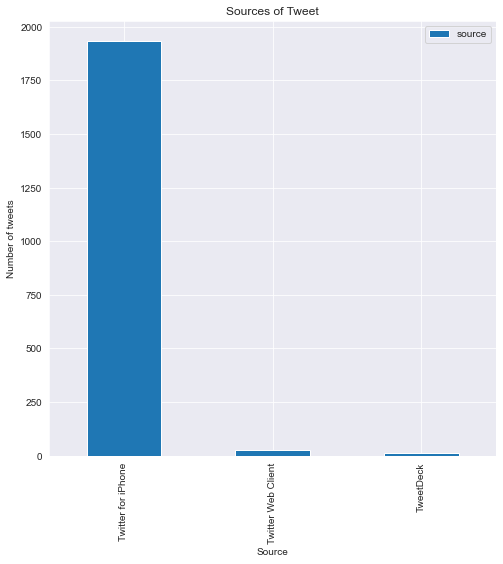

In [71]:
# A bar chart of the different sources of tweet
df.source.value_counts().plot(kind = 'bar', title = "Sources of Tweet",
                                xlabel = 'Source', ylabel = 'Number of tweets', figsize=(8,8))
plt.legend();

From this graph, we can see almost all tweets in the dataset were from Iphone (98%). With a lower proportion from twitter web client and tweetdeck. 

> Question 2: Is there a relationship between the retweet and favorite count

In [72]:
corr_count = df.retweet_count.corr(df.favorite_count)
corr_count

0.9130143486107434

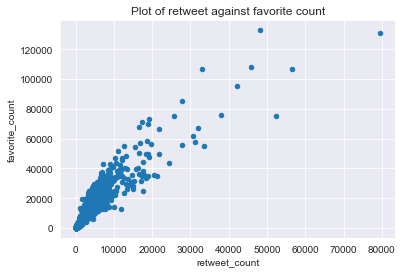

In [73]:
#Scatter plot to show the relationship
df.plot('retweet_count','favorite_count', kind = 'scatter',title = 'Plot of retweet against favorite count');

The correlation and scatter plot show a high positive relationship between the retweet and favorite count. Meaning as retweet count increases, so also does the favorite count increases.

> Question 3 : We want to view the trend of We Rate Dogs tweet over time.

In [74]:
# Grouping the tweets by month and year
monthly_tweets = df.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets['month_year'] = monthly_tweets.timestamp.apply(lambda x: x.strftime('%B-%Y')) 
monthly_tweets

,timestamp,tweet_id,month_year
0,2015-11-30 00:00:00+00:00,295,November-2015
1,2015-12-31 00:00:00+00:00,360,December-2015
2,2016-01-31 00:00:00+00:00,166,January-2016
3,2016-02-29 00:00:00+00:00,108,February-2016
4,2016-03-31 00:00:00+00:00,118,March-2016
...,...,...,...
17,2017-04-30 00:00:00+00:00,40,April-2017
18,2017-05-31 00:00:00+00:00,42,May-2017
19,2017-06-30 00:00:00+00:00,44,June-2017
20,2017-07-31 00:00:00+00:00,49,July-2017


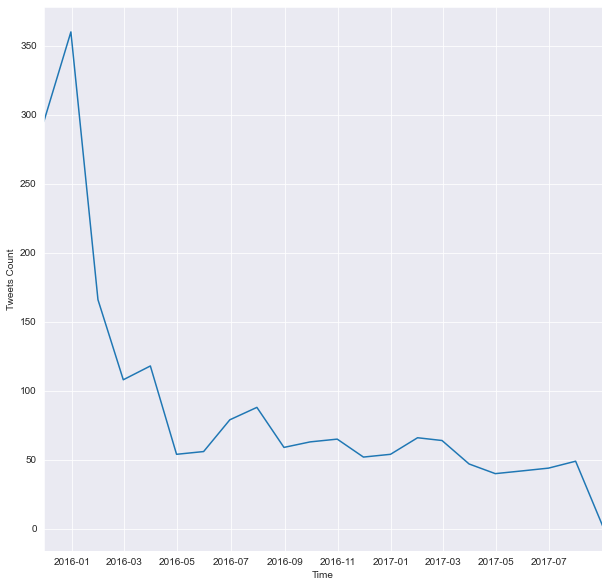

In [77]:
# Tweet Trend
plt.figure(figsize=(10, 10));

plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 8, 30)])
plt.xlabel('Time')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);

Our line graph does a decreasing trend over time, with december 2015 having the highest peak and August 2017 have the lowest point.

    > Question 4 : Is there a relationship between followers and retweet and favorite count ?

In [76]:
features = list(['retweet_count','favorite_count','followers_count'])
df[features].corr()

,retweet_count,favorite_count,followers_count
retweet_count,1.000000,0.913014,-0.365683
favorite_count,0.913014,1.000000,-0.548960
followers_count,-0.365683,-0.548960,1.000000


From the correlation analysis, there is a low negative correlation, -0.37. It can be inferred that followers count has a negative relationship with the retweet count. This shows that as followers of an account increases, the retweet reduces.  


Similarly, as followers increase, so also does the favorite count reduce. Although this has a moderate negative relationship (-0.55).